Instruction(name='pauli', num_qubits=3, num_clbits=0, params=['IXI'])
[-1.0, -1.0]


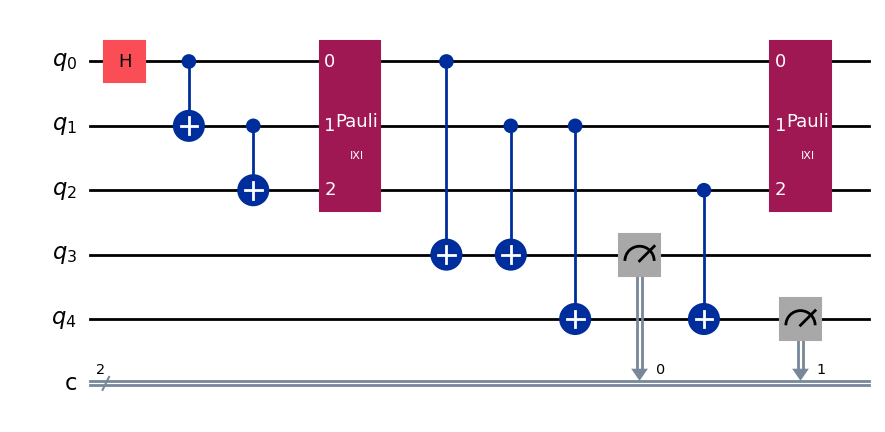

In [119]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli, Statevector
from qiskit_aer import Aer
from qiskit_aer.primitives import Estimator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import PauliGate
import numpy as np

pi = np.pi
sim = Aer.get_backend('aer_simulator')

e_gate = PauliGate('IXI')
print(e_gate)

def prepare_n_qubit_ghz_state(qubits, ancilla,classical = 0):
    qc = QuantumCircuit(qubits + ancilla, 2 )
    qc.h(0)
    # qc.p(pi/2, 0)
    for i in range(qubits-1):
        qc.cx(i, i+1)
    return qc

n = 3
a = 2
qc = prepare_n_qubit_ghz_state(n, a, classical= a)
qc.append(e_gate, range(n))

# stablizer 1
qc.cx(0, 3)
qc.cx(1, 3)

# stablizer 2
qc.cx(1, 4)
qc.cx(2, 4)

qc.measure(3, 0)
qc.measure(4, 1)
# print(qc.num_qubits)


# ZI = Pauli('ZI')
# # IZ = Pauli('III')
# obs = [ZI ]
# estimator = Estimator()
# job = estimator.run(qc , ZI)
# e = job.result().values
# print(e)
# qc.measure_all()
result = sim.run(qc).result()
counts = result.get_counts()

shots = sum(counts.values())

# if the bit string is zero the ex value is +1 otherwise -1, 
# in our case we have 2 bits after measuring ancilla bits
# and possible outcomes are 00, 01, 10, 11
# (-1)^{bit string value}


s0 = sum(
    ((-1) ** int(bitstring[0])) * count for bitstring, count in counts.items()
) / shots

s1 = sum(
    ((-1) ** int(bitstring[1])) * count for bitstring, count in counts.items()
) / shots

si = [s0, s1]
print(si)

def apply_c_gate(stablzier_value, qc, n):
    match stablzier_value:
        case [-1, 1]:
            c_gate = PauliGate('XII')
        case [-1, -1]:
            c_gate = PauliGate('IXI')
        case [1, -1]:
            c_gate = PauliGate('IIX')
        case _:
            c_gate = PauliGate('III')
    qc.append(c_gate, range(n))

apply_c_gate(si, qc, n)
qc.draw('mpl')       



# state = Statevector(qc)
# plot_bloch_multivector(state)





In [ ]:
# import random
# import cmath
# import numpy as np
# from qiskit import QuantumCircuit

# def random_qubit():
#     r1 = random.random()
#     r2 = 1-r1
#     theta1 = 2*np.pi*random.random()
#     theta2 = 2*np.pi*random.random()
#     z1 = cmath.rect(r1, theta1)
#     z2 = cmath.rect(r2, theta2)
#     q = QuantumCircuit(1)
#     amp = np.array([z1, z2])
#     q.initialize(amp, 0)
#     return q


# print(random_qubit())



QiskitError: 'Sum of amplitudes-squared is not 1, but 0.9875193882598546.'